In [1]:
from src.lib import *
from src.transfomer import *

## Data Prepocessing

In [2]:
with open("./data/Shakespeare.txt",'r') as f:
    text = f.read()

In [3]:
chars = sorted(list(set(text)))

In [4]:
vocab_size = len(chars)

In [5]:
vocab_size

65

In [6]:
str_to_idx = {char:idx for idx,char in enumerate(chars)}
idx_to_str = {idx:char for idx,char in enumerate(chars)}

In [7]:
encode = lambda s :[str_to_idx[i] for i in s]
decode = lambda l : "".join([idx_to_str[i] for i in l ])

In [8]:
text_encoded = encode(text)
text_encoded = torch.tensor(text_encoded)

In [9]:
p = 0.9
n = int(p * len(text_encoded))
train_data = text_encoded[0:n]
test_data = text_encoded[n:]

In [10]:
train_data.shape,test_data.shape

(torch.Size([1003854]), torch.Size([111540]))

## Embedding

In [11]:
B,T,C = 4,8,2
torch.tril(torch.rand(3,3))

tensor([[0.2991, 0.0000, 0.0000],
        [0.1964, 0.7732, 0.0000],
        [0.3072, 0.9999, 0.2349]])

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
model = Transformer(
    vocab_size=vocab_size,
    embed_size=384,
    heads=6,
    num_layers=6,
    max_len=1000,
    device=device,
    decode_vocab=decode,
    dropout=0.2
)

In [14]:
model.fit(train_data,batch_size=8,block_size=16,n_iter=10,print_every=1)

Iter: 0 Loss: 4.253781795501709
Inference: 
Z WlWhmjEFe rz3hkQsq
----------------------------------
Iter: 1 Loss: 3.9486031532287598
Inference: 
 vrUY!erSe,.Ztn
sNPn
----------------------------------
Iter: 2 Loss: 3.7396886348724365
Inference: 
RqC'dne.eEUneUsyeney
----------------------------------
Iter: 3 Loss: 3.486492395401001
Inference: 
tg A Yeto XunhF3Zv n
----------------------------------
Iter: 4 Loss: 3.440809965133667
Inference: 
WtrfoKsX ttehsmeR;ln
----------------------------------
Iter: 5 Loss: 3.2542357444763184
Inference: 
X  aRtgheKde thois ,
----------------------------------
Iter: 6 Loss: 3.3973586559295654
Inference: 
U
Urweo
h;re
: e   e
----------------------------------
Iter: 7 Loss: 3.283235549926758
Inference: 
U&vioaebDieensdejk n
----------------------------------
Iter: 8 Loss: 3.261681079864502
Inference: 
Tdu weKBdhui stbiu b
----------------------------------
Iter: 9 Loss: 3.455413341522217
Inference: 
&btohlshad-jbadC;arn
-------------------------------

In [15]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.inference(context, max_token=500)[0].tolist()))


mn dr.ah ynoodo, oirntnqZjaWoMAh ! lnahP-w,  ax aeoafspha? hjv s E 
tW TnoSdlv:auontrai
dohapNaopCsWe !jKtweed$ai 
f,anh?hd,cino.etgZn
w a  3abaoJPhlahnrh e  mhnr:i aroFy!qlw sn eP;l
,dct Nv ahi yojigpaNen   e,lwg
,ak c eKt yada :Sa Wo as gendaedre 
h tengh.e ttoTuTswn m oha'o r Rdg,ookaben yadtDyha p;iiiraos.ro heaRznha:de .ue m VAan aahbwto ?;uI hYsdrnonidt ylsi mB h3s eFtQ  oin
sMl
r 
taetyr3rMS  g dTtF  
XS ayoxhojeoXQwEiyodat
adtlktnr.ka o dovo  nehl oginnihPeLH jEiHFn broV  ebgE3,r :nnaeo 


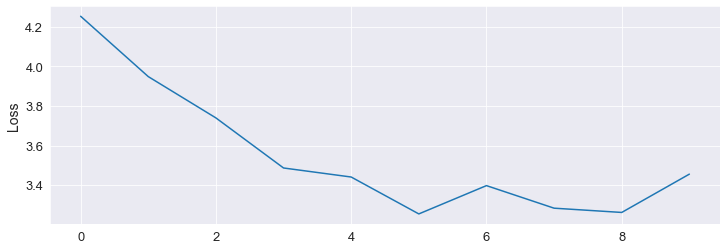

In [16]:
model.plot()